# Analysis of Superstore Sales Data
**Profit Classification using supervised regression models**

**Author:** M.Umer Mehmood

**Email:** umermehmood5149@gmail.com

**Date:** 27/07/25

**Dataset:** [https://www.kaggle.com/datasets/vivek468/superstore-dataset-final]

# Problem Statement

 This project will explore a retail sales dataset from a superstore, focusing on
 analyzing sales trends, customer segments, product performance, and profitability.
 The dataset includes transaction-level details such as sales, quantities, discounts, and
 profit, along with customer and product information. The aim is to extract actionable
 insights that can help optimize inventory management, sales strategies, and overall
 business performance.

# Import Libraries

In [6]:
# general libraries

import pandas as pd
import numpy as np

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Loading Dataset(Application Record)

In [7]:
df_superstore_data = pd.read_csv("/kaggle/input/store-sales-analysis1/Sample - Superstore.csv", encoding='latin1')

print(df_superstore_data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

# Getting know about the dataset(Application Record)

In [8]:
# checking shape of the dataset (application_record)

print('The number of rows in Application Record dataset is', df_superstore_data.shape[0] , '\n')

print('The number of columns in Application Record dataset is', df_superstore_data.shape[1])


The number of rows in Application Record dataset is 9994 

The number of columns in Application Record dataset is 21


In [9]:
df_superstore_data.dtypes # checking datatypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

**Observation**

1. The dataset of application record contains 9994 rows and 21 columns
2. This dataset contains 15 of columns of object datatype
3. And remaining 6 columns has of numric datatype

# Checking for missing values & Dealing with them

In [10]:
df_superstore_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

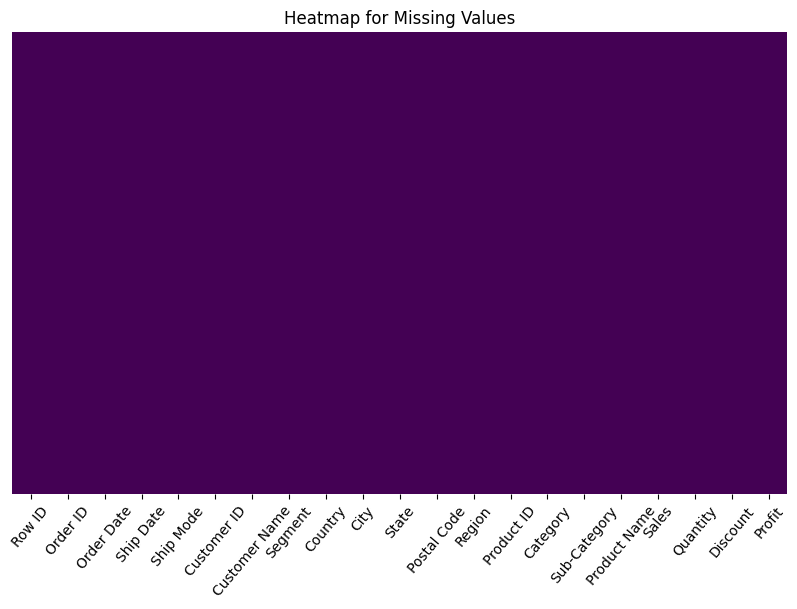

In [11]:
# plotting the heatmap to check for null values

# definig the figure size
plt.figure(figsize=(10, 6))

# plotting the heatmap of missing values
sns.heatmap(df_superstore_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

# defining the title
plt.title('Heatmap for Missing Values')
plt.xticks(rotation=50)
plt.show()

**Observation**

There is no null value in whole dataset

As we can see in heatmap the map shows that there is no null value.

In [12]:
# confirming the outcome 

df_superstore_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Checking for duplicates 

In [13]:
df_superstore_data.duplicated().sum()

0

In [14]:
df_superstore_data[df_superstore_data['Order ID'].duplicated()].head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
10,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,0.2,85.3092
11,12,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
15,16,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160
19,20,CA-2014-143336,8/27/2014,9/1/2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110


In [15]:
df_superstore_data[df_superstore_data['Order ID'].duplicated()].tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9975,9976,US-2016-103674,12/6/2016,12/10/2016,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.360,2,0.0,6.4128
9976,9977,US-2016-103674,12/6/2016,12/10/2016,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,0.2,31.1980
9977,9978,US-2016-103674,12/6/2016,12/10/2016,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,0.0000
9978,9979,US-2016-103674,12/6/2016,12/10/2016,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816
9979,9980,US-2016-103674,12/6/2016,12/10/2016,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152
9983,9984,US-2016-157728,9/22/2016,9/28/2016,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9985,9986,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


**Observation**

1. Multiple entries with the same 'Order ID' indicate that single orders often contain multiple items.

2. The head(10) and tail(10) functions help inspect the earliest and latest duplicated orders in the dataset.


# Mapping the values in a meaningful way

In [16]:
df_superstore_data.select_dtypes(include='object').columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [17]:
# check for unique values in status column

df_superstore_data['Ship Date'].value_counts()

Ship Date
12/16/2015    35
9/26/2017     34
12/6/2017     32
11/21/2017    32
9/6/2017      30
12/12/2017    30
9/15/2017     30
9/13/2014     27
9/8/2017      27
11/18/2017    26
9/26/2015     26
9/7/2016      26
11/17/2015    25
11/16/2017    25
11/26/2016    24
10/3/2014     23
11/30/2016    23
12/28/2017    23
10/1/2016     23
6/4/2016      23
9/23/2015     23
9/14/2014     23
11/9/2016     22
11/5/2017     22
12/12/2016    22
9/13/2017     22
12/31/2015    22
9/6/2016      22
7/18/2017     22
10/24/2017    21
11/16/2016    21
9/11/2017     21
9/12/2014     21
12/5/2017     21
11/16/2014    21
11/24/2016    21
11/12/2017    21
9/29/2017     21
12/13/2017    21
10/11/2017    21
1/1/2018      20
9/8/2016      20
9/25/2017     20
11/25/2015    20
9/28/2017     20
12/30/2016    20
3/22/2017     20
12/9/2015     20
12/21/2014    20
11/8/2016     20
6/10/2017     20
7/22/2016     20
12/11/2016    20
11/14/2015    19
3/21/2014     19
12/9/2017     19
9/22/2016     19
12/13/2016    19
11/3

# Exploratory Data Analysis

**Purpose**

1. The main goal of the analysis is to get ideas about the different attributes.

2. To get an overview of the distribution of the data.

3. To get an overview of the relationship between the attributes.

4. Particularly, to get an overview of the relationship between the attributes and the target variable.

**Top 10 Products by Sales and Profit**

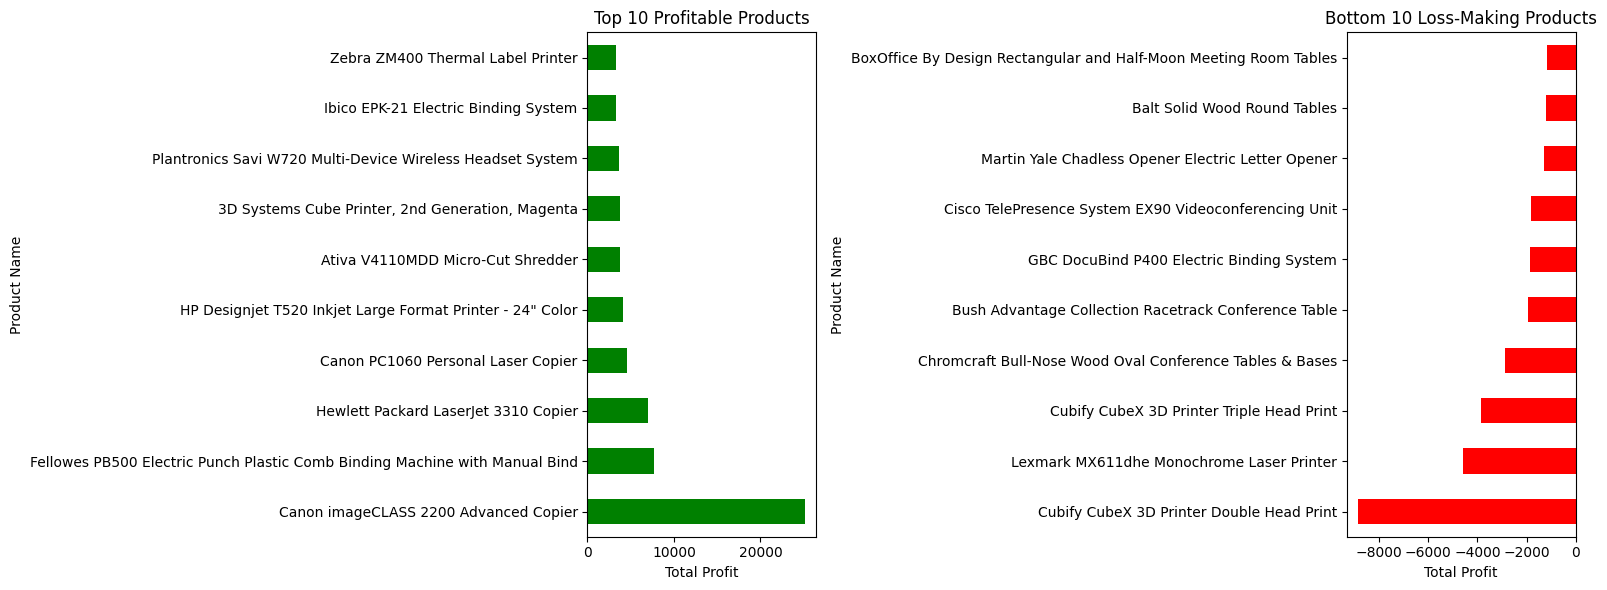

In [19]:
# Top 10 profitable products
top_products = df.groupby('Product Name')['Profit'].sum().nlargest(10)

# Bottom 10 loss-making products
worst_products = df.groupby('Product Name')['Profit'].sum().nsmallest(10)

# Plot both
fig, axes = plt.subplots(1,2, figsize=(16,6))

top_products.plot(kind='barh', ax=axes[0], color='green')
axes[0].set_title("Top 10 Profitable Products")
axes[0].set_xlabel("Total Profit")

worst_products.plot(kind='barh', ax=axes[1], color='red')
axes[1].set_title("Bottom 10 Loss-Making Products")
axes[1].set_xlabel("Total Profit")

plt.tight_layout()
plt.show()


**Observation**

1. It then identifies the top 10 products by sales and visualizes both their sales and profit using a horizontal bar chart.

2. This helps compare which high-selling products are also highly profitable and which may generate lower profit despite high sales.

# Identify Key Performance Indicators (KPIs)

In [20]:
total_sales = df_superstore_data['Sales'].sum()
total_profit = df_superstore_data['Profit'].sum()
avg_profit_margin = (total_profit / total_sales) * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Average Profit Margin: 12.47%


# Advanced Analysis

**Impact of Discounts on Product Performance**

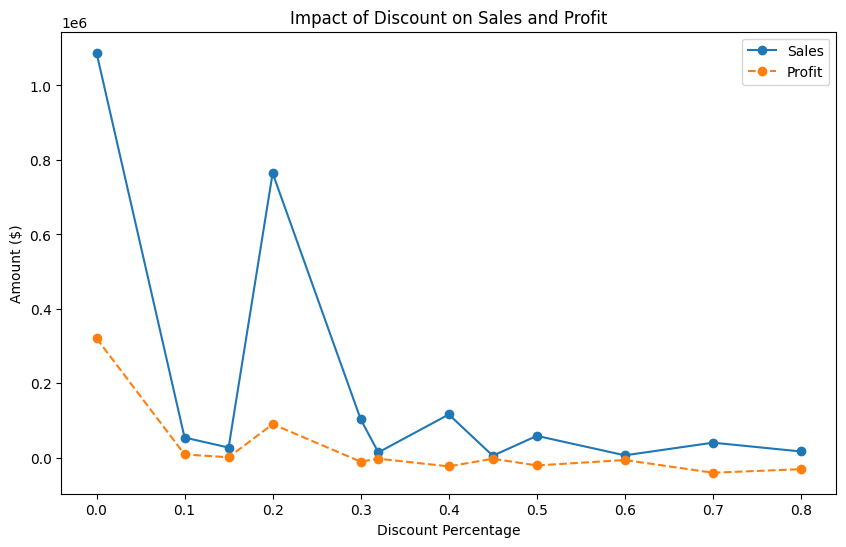

In [23]:
discount_analysis = df_superstore_data.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(discount_analysis['Discount'], discount_analysis['Sales'], label='Sales', marker='o')
plt.plot(discount_analysis['Discount'], discount_analysis['Profit'], label='Profit', marker='o', linestyle='--')
plt.xlabel('Discount Percentage')
plt.ylabel('Amount ($)')
plt.title('Impact of Discount on Sales and Profit')
plt.legend()
plt.show()


**Observation**

1. The code analyzes how different discount levels affect overall sales and profit
   
2. It uses a line plot to show trends between discount percentage and the corresponding sales and profit amounts.

3. The visualization helps identify whether higher discounts boost sales and how they impact profitability, revealing potential trade-offs.


**Compare Product Performance Across Regions and Segments**

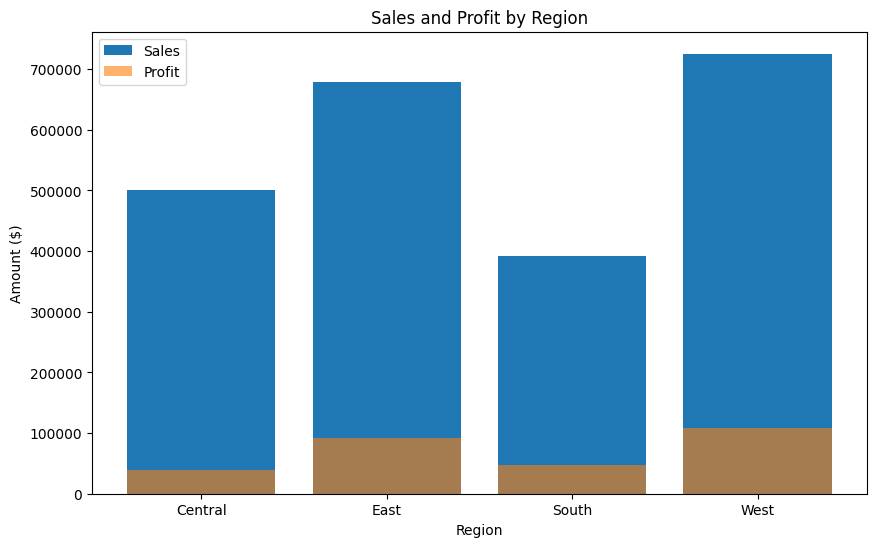

In [24]:
region_performance = df_superstore_data.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(region_performance['Region'], region_performance['Sales'], label='Sales')
plt.bar(region_performance['Region'], region_performance['Profit'], label='Profit', alpha=0.6)
plt.xlabel('Region')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit by Region')
plt.legend()
plt.show()


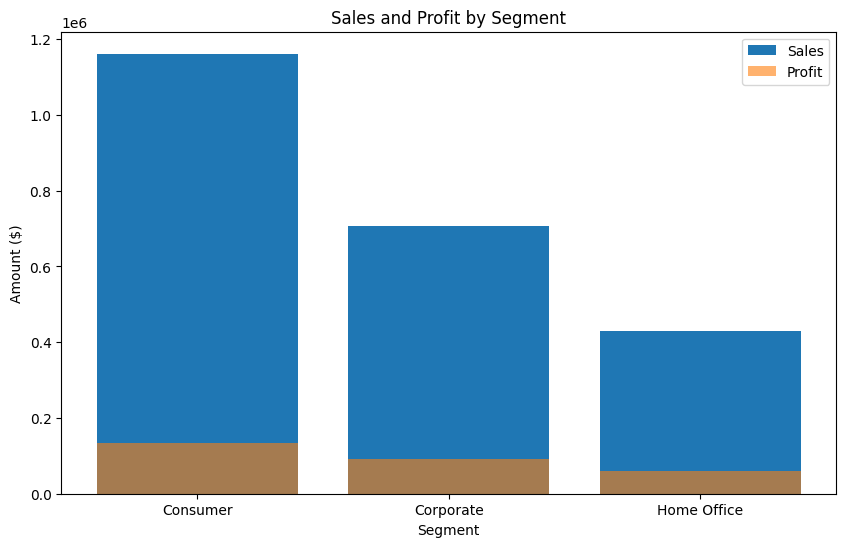

In [25]:
segment_performance = df_superstore_data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(segment_performance['Segment'], segment_performance['Sales'], label='Sales')
plt.bar(segment_performance['Segment'], segment_performance['Profit'], label='Profit', alpha=0.6)
plt.xlabel('Segment')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit by Segment')
plt.legend()
plt.show()


**Observation**

1. First chart shows us sales and profit on the basis of different regions which consist of 4 different regions of united states.

2. Second chart displays sales and profit on the basis of different segments which consist of 4 different segments.

# Prepare Insights and Report

This step involves generating insights and visualizations, which could be combined into a report. For this, you can create a simple summary dataframe or use any reporting tool (e.g., Jupyter Notebook or PowerPoint) to present the findings.

In [26]:
category_performance = df_superstore_data.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

print(category_performance.sort_values('Sales', ascending=False))

category_performance.to_excel("product_performance_report.xlsx", index=False)


          Category        Sales       Profit
2       Technology  836154.0330  145454.9481
0        Furniture  741999.7953   18451.2728
1  Office Supplies  719047.0320  122490.8008


# Model Selection

In [27]:
df_superstore_data = df_superstore_data[['Sales', 'Profit']].dropna()
df_superstore_data = df_superstore_data[df_superstore_data['Sales'] > 0]

X = df_superstore_data[['Sales']]
y = df_superstore_data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} — MAE: {mean_absolute_error(y_test, y_pred):.2f}, "
          f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}, "
          f"R²: {r2_score(y_test, y_pred):.2f}")


Linear Regression — MAE: 70.90, RMSE: 295.02, R²: -0.80
Random Forest — MAE: 58.53, RMSE: 315.39, R²: -1.05
Gradient Boosting — MAE: 60.33, RMSE: 339.16, R²: -1.37


# Linear Regression
**Actual Vs Predicted Profit**

Linear Regression — MAE: 32.06, RMSE: 214.53, R²: 0.41


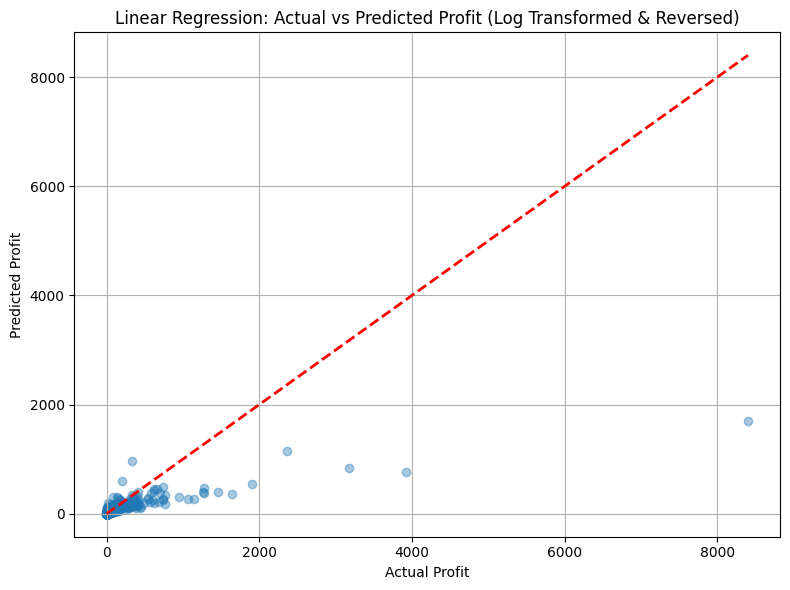

In [28]:

features = ['Sales', 'Discount', 'Quantity', 'Category', 'Segment', 'Region', 'Ship Mode']
target = 'Profit'


df_log = df[features + [target]].dropna()
df_log = df_log[df_log['Profit'] > -1]


df_log['Sales'] = np.log1p(df_log['Sales'])
df_log['Profit'] = np.log1p(df_log['Profit'])

df_encoded = pd.get_dummies(df_log, columns=['Category', 'Segment', 'Region', 'Ship Mode'], drop_first=True)


X = df_encoded.drop(columns=['Profit'])
y = df_encoded['Profit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_log = lr_model.predict(X_test)

y_pred_log_clipped = np.clip(y_pred_log, a_min=None, a_max=20)
y_test_log_clipped = np.clip(y_test, a_min=None, a_max=20)

y_pred_real = np.expm1(y_pred_log_clipped)
y_test_real = np.expm1(y_test_log_clipped)

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)
r2 = r2_score(y_test_real, y_pred_real)

print(f"Linear Regression — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.4)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], 'r--', lw=2)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Linear Regression: Actual vs Predicted Profit (Log Transformed & Reversed)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Random forest
**Actual Vs Predicted Profit**

Random Forest — MAE: 25.34, RMSE: 137.80, R²: 0.76


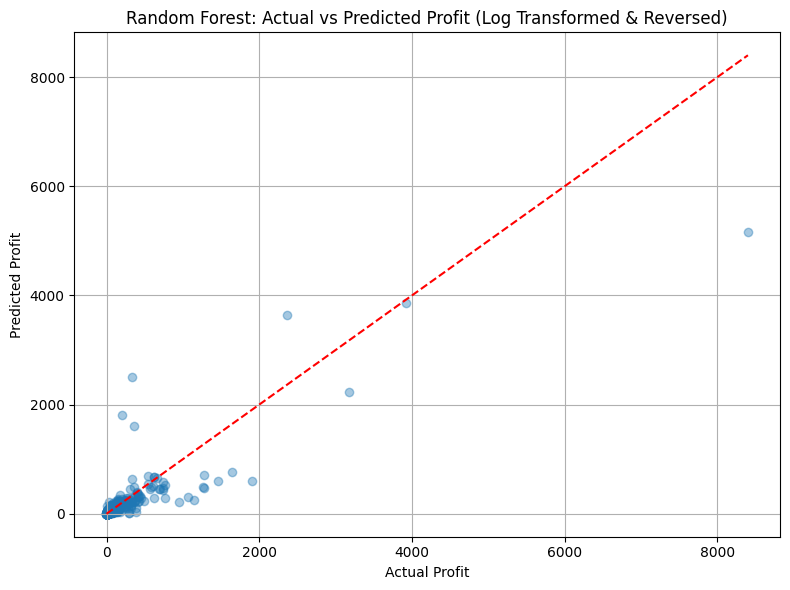

In [29]:

features = ['Sales', 'Discount', 'Quantity', 'Category', 'Segment', 'Region', 'Ship Mode']
target = 'Profit'

df_log = df[features + [target]].dropna()
df_log = df_log[df_log['Profit'] > -1]  

df_log['Sales'] = np.log1p(df_log['Sales'])
df_log['Profit'] = np.log1p(df_log['Profit'])

df_encoded = pd.get_dummies(df_log, columns=['Category', 'Segment', 'Region', 'Ship Mode'], drop_first=True)

X = df_encoded.drop(columns=['Profit'])
y = df_encoded['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_log = rf_model.predict(X_test)

y_pred_log_clipped = np.clip(y_pred_log, a_min=None, a_max=20)
y_test_log_clipped = np.clip(y_test, a_min=None, a_max=20)

y_pred_real = np.expm1(y_pred_log_clipped)
y_test_real = np.expm1(y_test_log_clipped)

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)
r2 = r2_score(y_test_real, y_pred_real)

print(f"Random Forest — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.4)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Random Forest: Actual vs Predicted Profit (Log Transformed & Reversed)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Gradient Boosting
**Actual Vs Predicted Profit**

Gradient_Boosting — MAE: 26.75, RMSE: 141.47, R²: 0.74


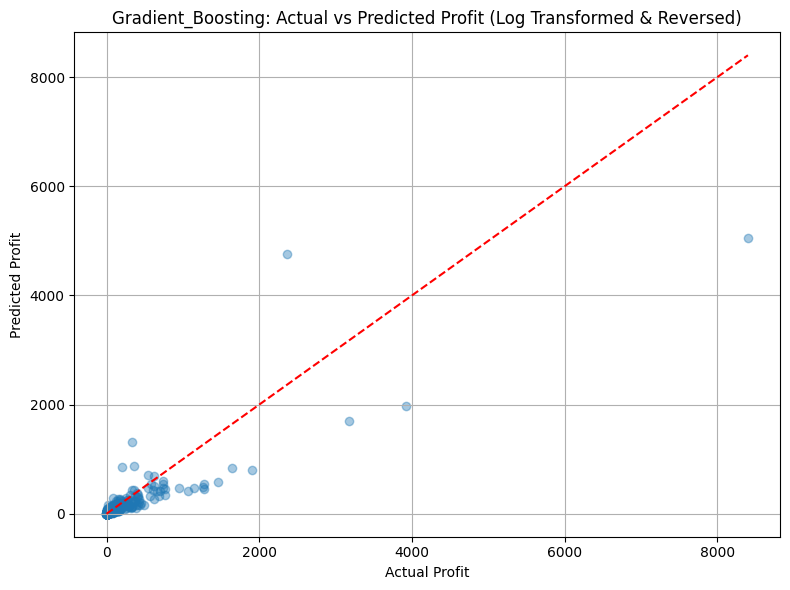

In [30]:
features = ['Sales', 'Discount', 'Quantity', 'Category', 'Segment', 'Region', 'Ship Mode']
target = 'Profit'

df_log = df[features + [target]].dropna()
df_log = df_log[df_log['Profit'] > -1]  

df_log['Sales'] = np.log1p(df_log['Sales'])
df_log['Profit'] = np.log1p(df_log['Profit'])

df_encoded = pd.get_dummies(df_log, columns=['Category', 'Segment', 'Region', 'Ship Mode'], drop_first=True)

X = df_encoded.drop(columns=['Profit'])
y = df_encoded['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_log = rf_model.predict(X_test)

y_pred_log_clipped = np.clip(y_pred_log, a_min=None, a_max=20)
y_test_log_clipped = np.clip(y_test, a_min=None, a_max=20)

y_pred_real = np.expm1(y_pred_log_clipped)
y_test_real = np.expm1(y_test_log_clipped)

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)
r2 = r2_score(y_test_real, y_pred_real)

print(f"Gradient_Boosting — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.4)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Gradient_Boosting: Actual vs Predicted Profit (Log Transformed & Reversed)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Observation**

* **Model Comparison**: Three regression models — Linear Regression, Random Forest, and Gradient Boosting — are trained and evaluated on predicting profit (after log transformation), allowing comparison of their predictive accuracy using MAE, RMSE, and R² scores.

* **Log Transformation**: The code applies `log1p()` to handle skewness in `Sales` and `Profit`, and then reverses it using `expm1()` after prediction to bring values back to the original scale, improving model performance and interpretability.

* **Evaluation Visualization**: Scatter plots of actual vs. predicted profit for each model help visually assess how well predictions align with true values, with a red dashed line (`y = x`) serving as a reference for perfect prediction.

# Anomalies
**Sales Vs Quantity**

Quantity anomalies detected (Z-score method): 113
Sales anomalies detected (IQR method): 1167


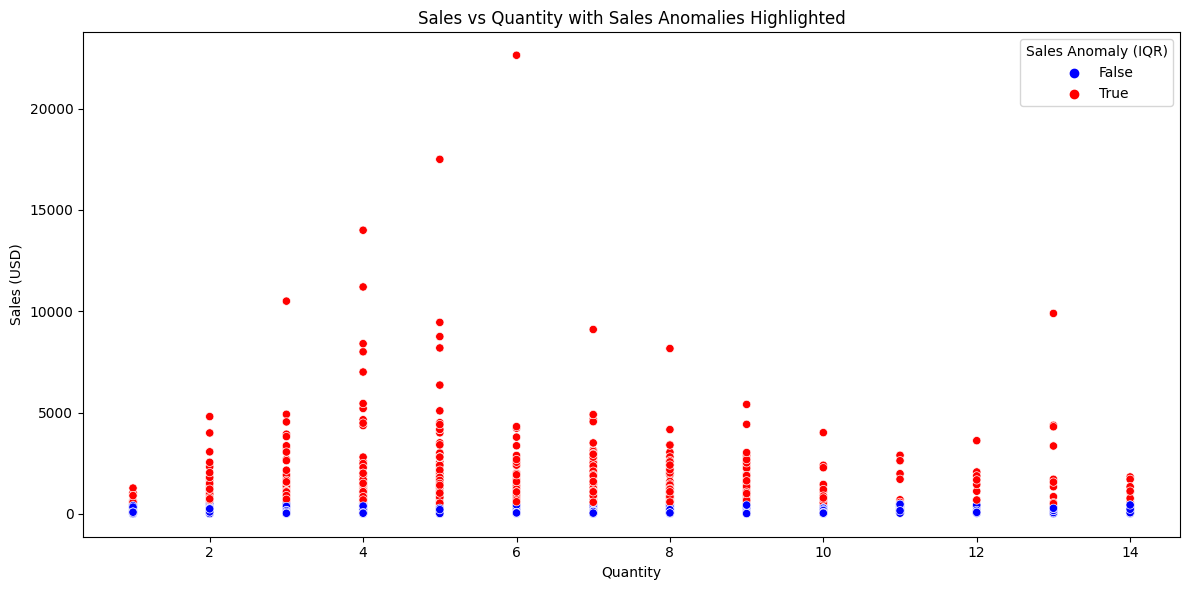

In [31]:
# Method 1: Z-score method (for Quantity)
df['z_score_quantity'] = (df['Quantity'] - df['Quantity'].mean()) / df['Quantity'].std()
df['quantity_anomaly_z'] = df['z_score_quantity'].abs() > 3  # Z-score > 3 considered anomaly

# Method 2: IQR method (for Sales)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['sales_anomaly_iqr'] = (df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)

# Summary
num_quantity_anomalies = df['quantity_anomaly_z'].sum()
num_sales_anomalies = df['sales_anomaly_iqr'].sum()
print(f"Quantity anomalies detected (Z-score method): {num_quantity_anomalies}")
print(f"Sales anomalies detected (IQR method): {num_sales_anomalies}")

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Quantity', y='Sales', hue='sales_anomaly_iqr', palette={False: 'blue', True: 'red'})
plt.title('Sales vs Quantity with Sales Anomalies Highlighted')
plt.xlabel('Quantity')
plt.ylabel('Sales (USD)')
plt.legend(title='Sales Anomaly (IQR)')
plt.tight_layout()
plt.show()


**Monthly Sales Anomaly**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


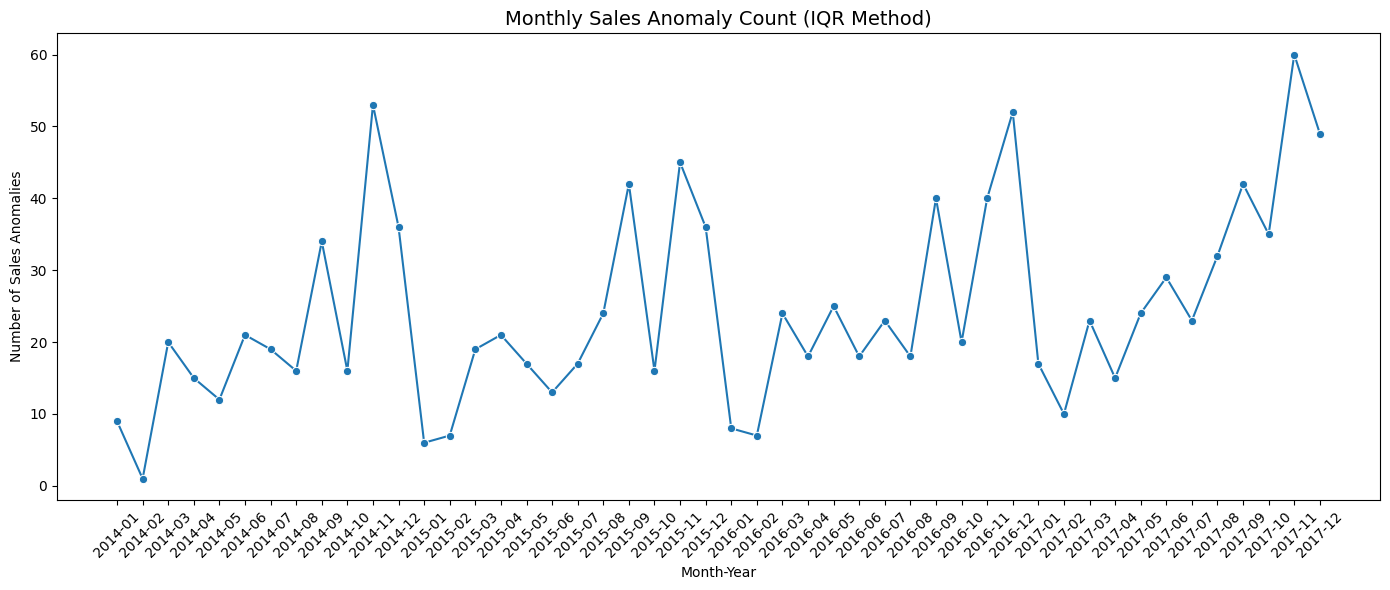

In [32]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['sales_anomaly_iqr'] = (df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)

df['Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)

anomaly_trend = df[df['sales_anomaly_iqr']].groupby('Month-Year').size().reset_index(name='Anomaly Count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=anomaly_trend, x='Month-Year', y='Anomaly Count', marker='o')
plt.title('Monthly Sales Anomaly Count (IQR Method)', fontsize=14)
plt.xlabel('Month-Year')
plt.ylabel('Number of Sales Anomalies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data Analysis and Findings

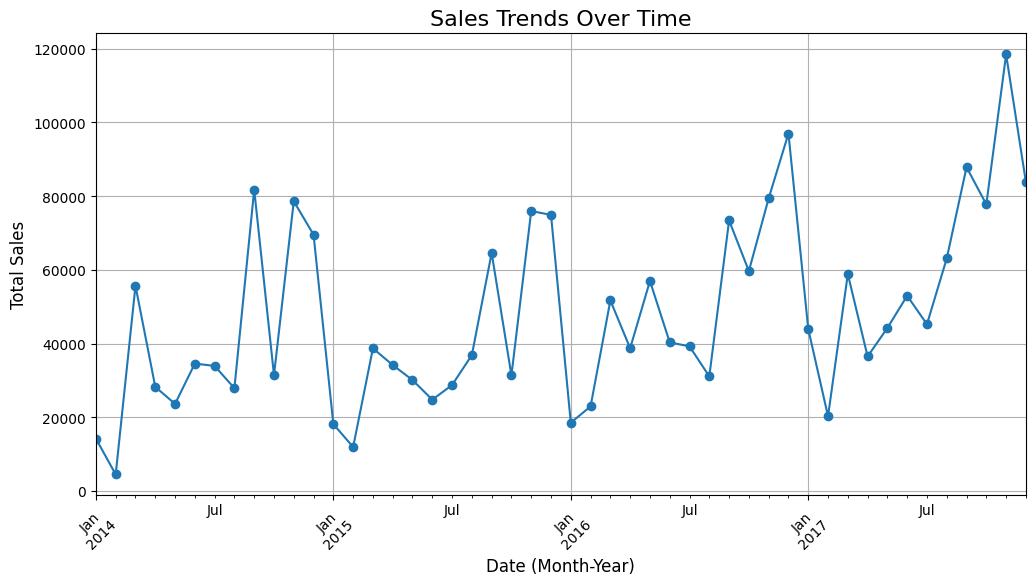

In [37]:

# Convert Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group sales by month-year
sales_trend = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()

# Plot
plt.figure(figsize=(12,6))
sales_trend.plot(kind='line', marker='o')
plt.title("Sales Trends Over Time", fontsize=16)
plt.xlabel("Date (Month-Year)", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


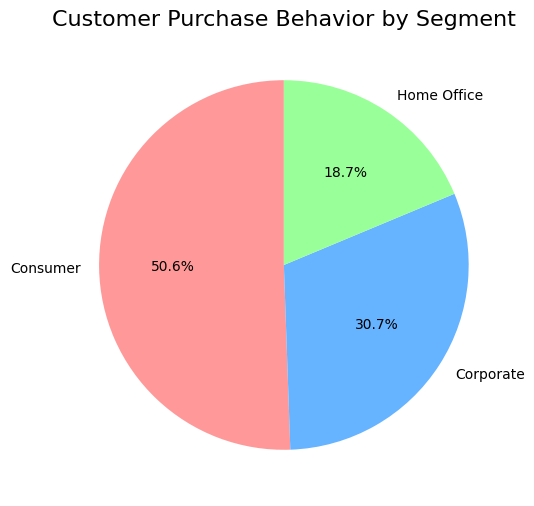

In [33]:
# Sales by customer segment
segment_sales = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(6,6))
segment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Customer Purchase Behavior by Segment", fontsize=16)
plt.ylabel("")
plt.show()


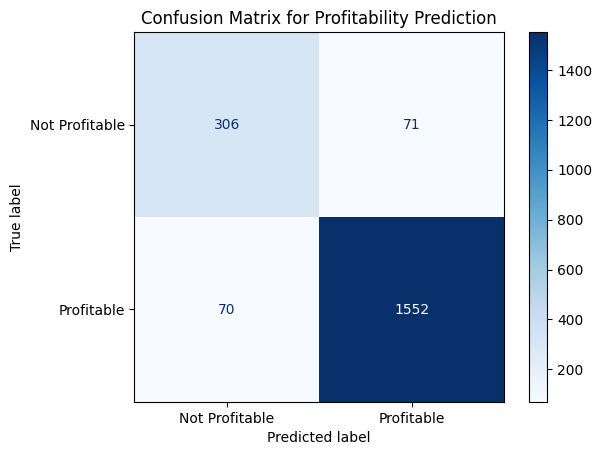

In [35]:

# Create target variable: 1 = Profitable, 0 = Not Profitable
df['Profitable'] = (df['Profit'] > 0).astype(int)

# Select features
features = ['Sales', 'Quantity', 'Discount', 'Category', 'Segment', 'Region']
X = df[features]
y = df['Profitable']

# Encode categorical features
X = X.copy()
for col in ['Category', 'Segment', 'Region']:
    X[col] = LabelEncoder().fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple classifier (Decision Tree)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Profitable", "Profitable"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Profitability Prediction")
plt.show()


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Model Performance Metrics:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1-Score  : {f1:.2f}")


Model Performance Metrics:
Accuracy  : 0.93
Precision : 0.96
Recall    : 0.96
F1-Score  : 0.96
